In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('/kaggle/input/traffic-accidents/traffic_accidents.csv')
df = data.copy()
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [34]:
df.shape

(209306, 24)

<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  EDA 📊
</h1>

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Statistical Analysis
</h3>

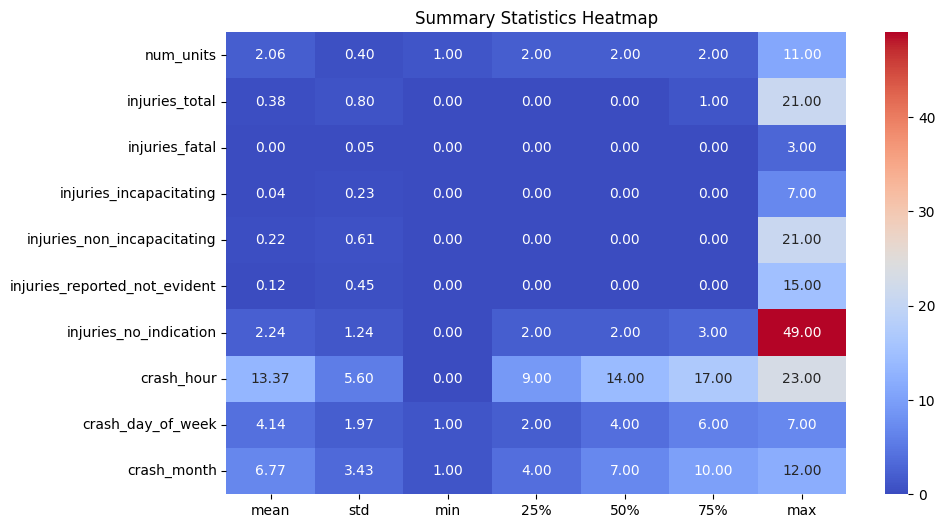

In [35]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Missing Data Analysis
</h3>

In [36]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [37]:
missing_percentage = df.isnull().mean() * 100

missing_table = pd.DataFrame({
    'Missing Data Percentage (%)': missing_percentage
}).reset_index().rename(columns={'index': 'Column'})

print(tabulate(missing_table, headers='keys', tablefmt='grid', showindex=False))

+-------------------------------+-------------------------------+
| Column                        |   Missing Data Percentage (%) |
+===============================+===============================+
| crash_date                    |                             0 |
+-------------------------------+-------------------------------+
| traffic_control_device        |                             0 |
+-------------------------------+-------------------------------+
| weather_condition             |                             0 |
+-------------------------------+-------------------------------+
| lighting_condition            |                             0 |
+-------------------------------+-------------------------------+
| first_crash_type              |                             0 |
+-------------------------------+-------------------------------+
| trafficway_type               |                             0 |
+-------------------------------+-------------------------------+
| alignmen

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Outlier Analysis
</h3>

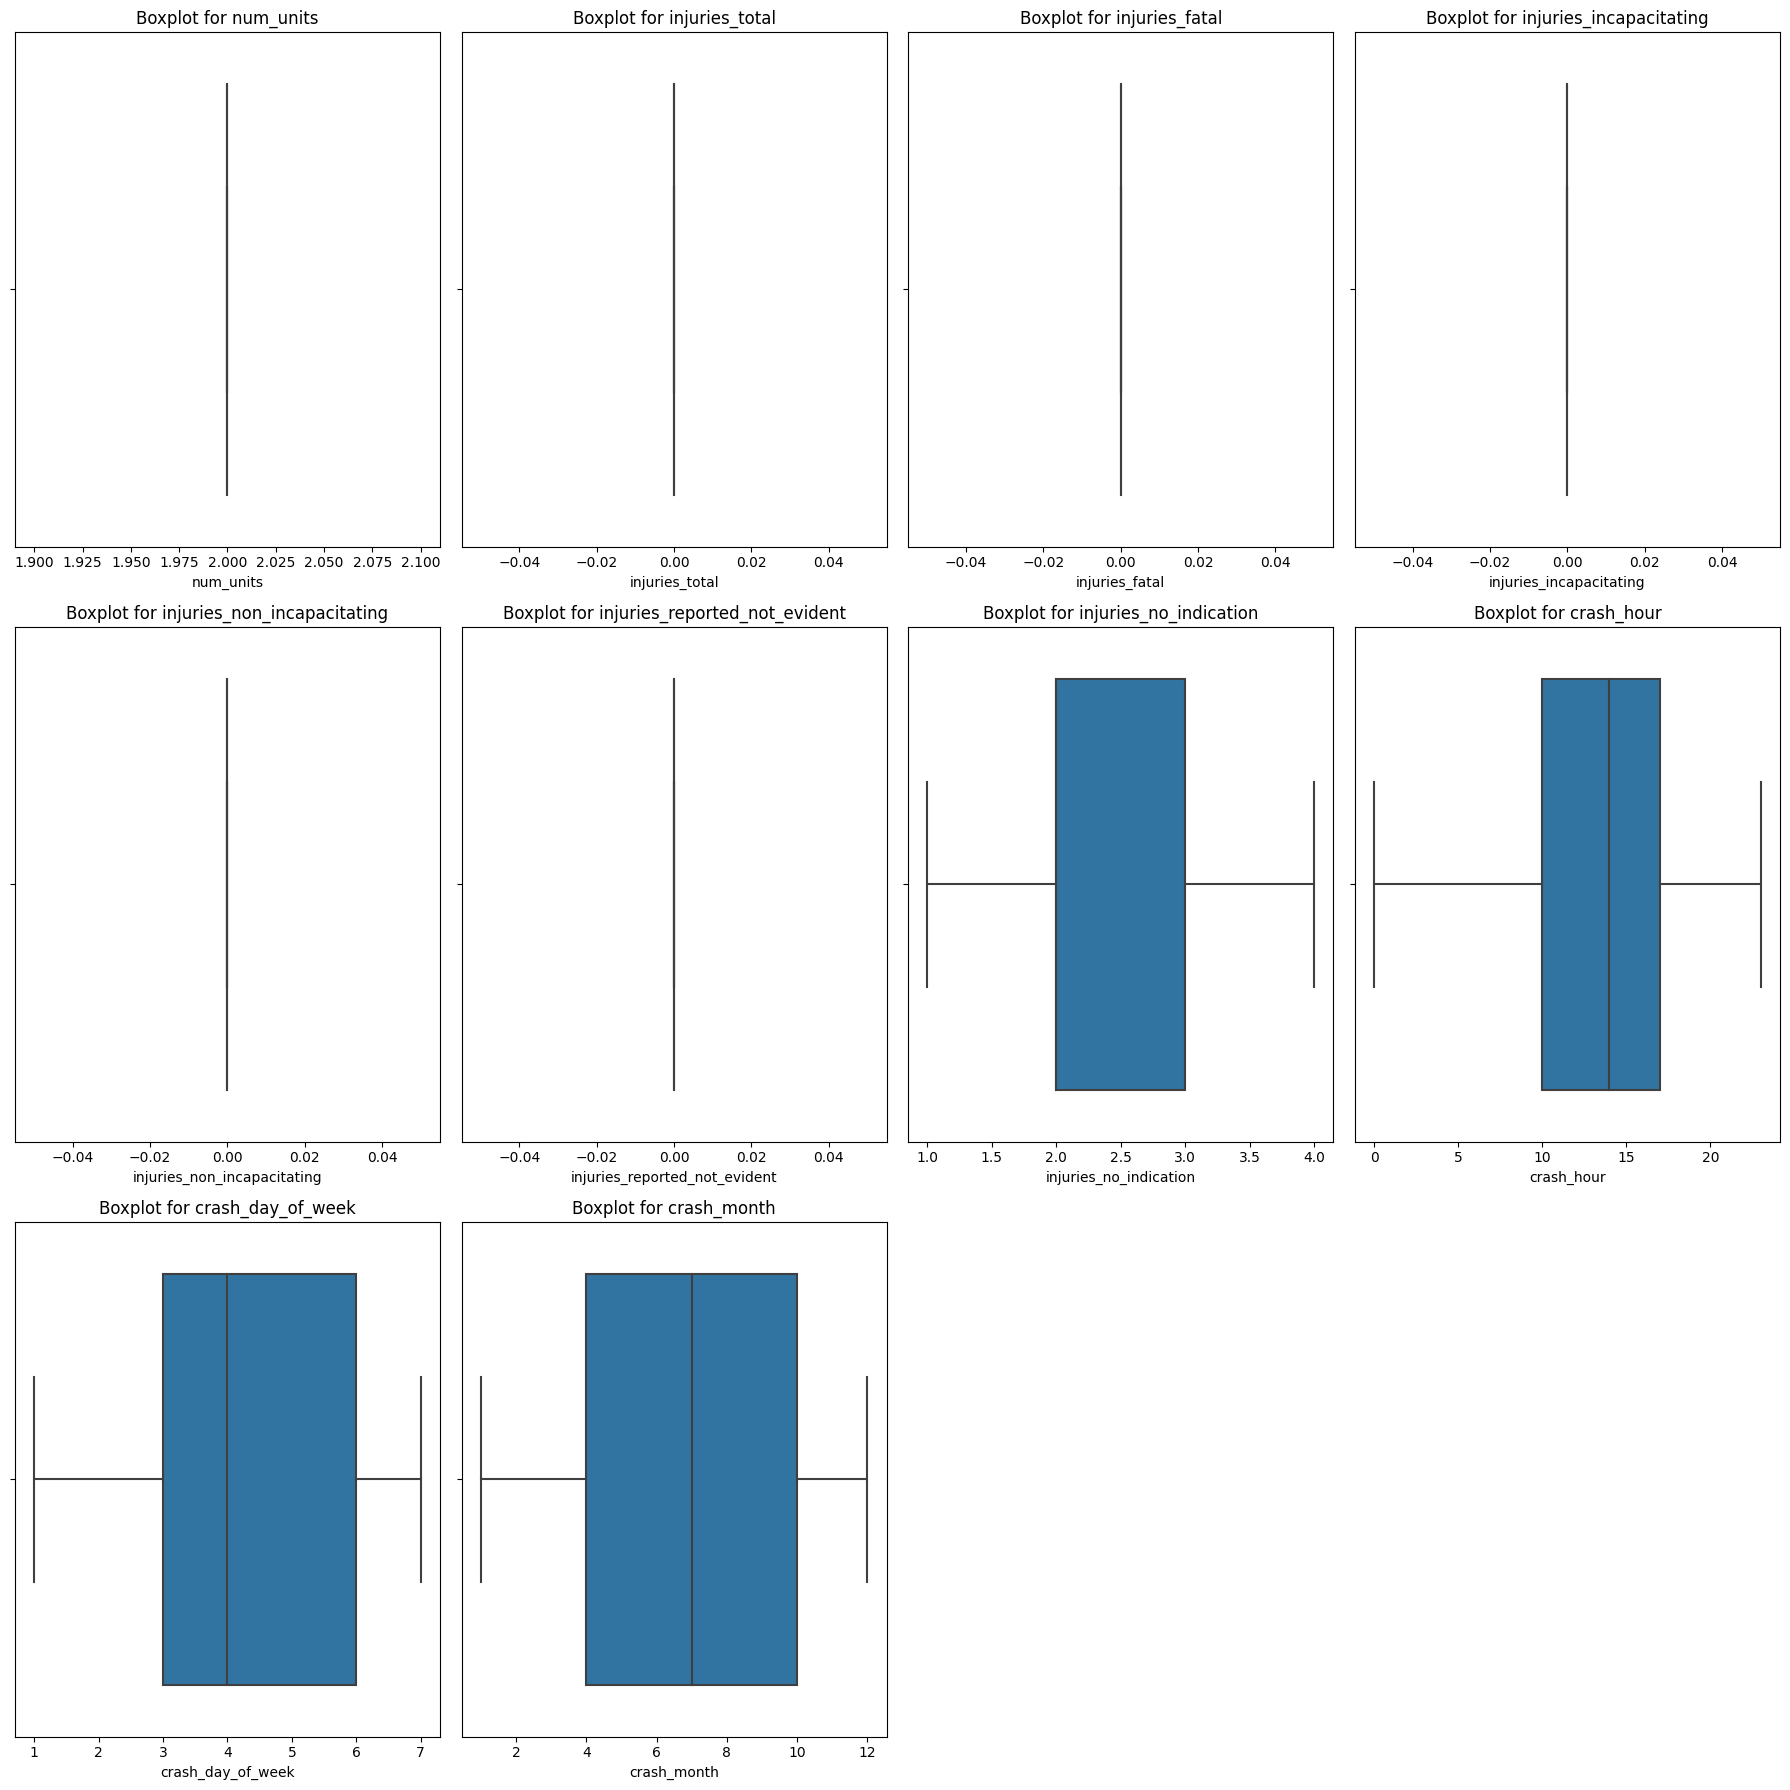

In [38]:
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4 
    num_rows = -(-num_columns // num_per_row)  

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return df

df = remove_outliers(df)


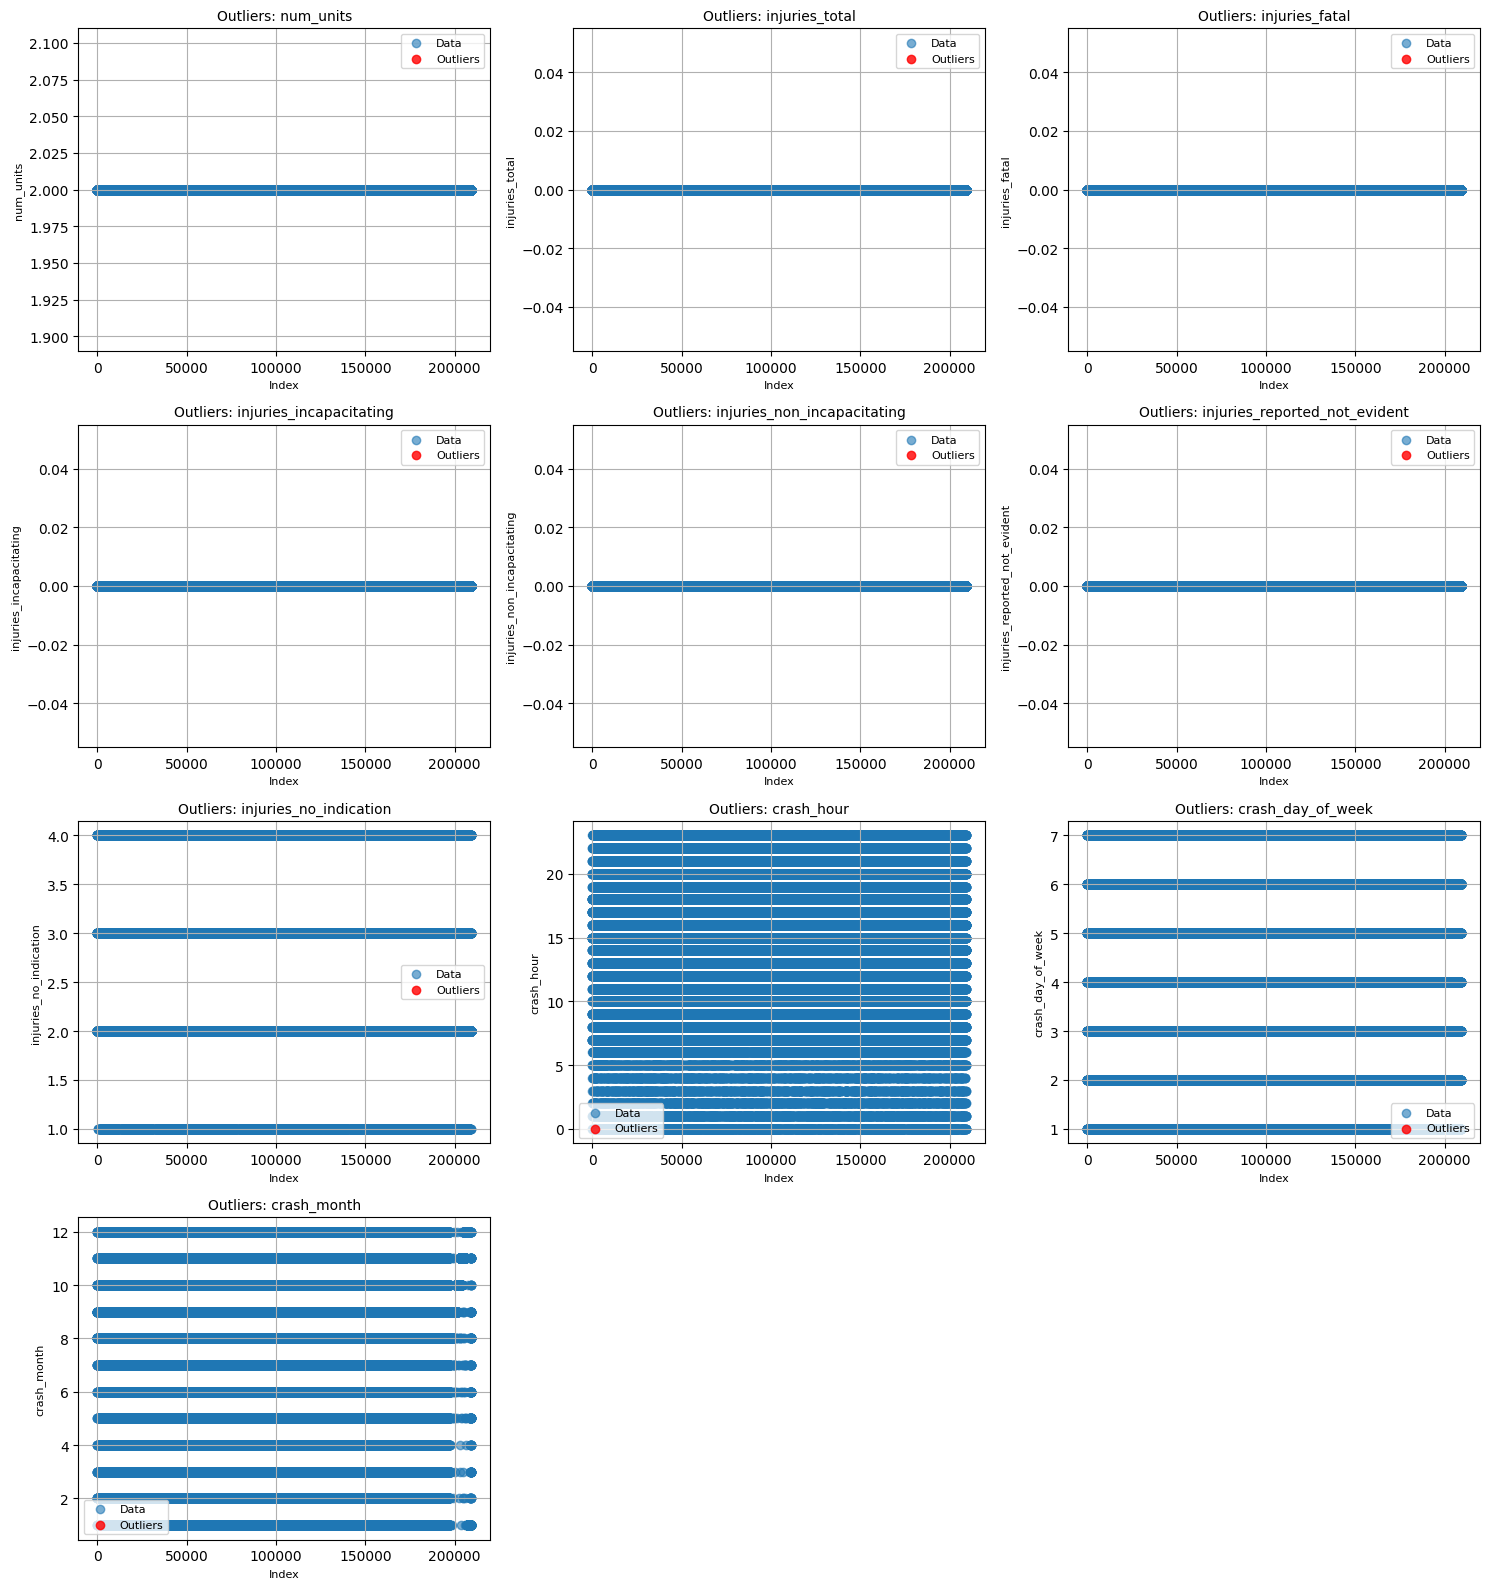

In [39]:
def plot_outliers_iqr(data):

    numeric_columns = data.select_dtypes(include=[np.number]).columns
    threshold = 1.5
    n_cols = 3 
    n_rows = -(-len(numeric_columns) // n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), squeeze=False)
    axes = axes.flatten() 
    
    for idx, column in enumerate(numeric_columns):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

        axes[idx].scatter(data.index, data[column], label='Data', alpha=0.6)
        axes[idx].scatter(data.index[outliers], data[column][outliers], color='red', label='Outliers', alpha=0.8)
        axes[idx].set_title(f"Outliers: {column}", fontsize=10)
        axes[idx].set_xlabel("Index", fontsize=8)
        axes[idx].set_ylabel(column, fontsize=8)
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True)
        
    for ax in axes[len(numeric_columns):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
plot_outliers_iqr(df)

<h4 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Color Palette
</h4>

In [40]:
colors = ['#1e2a38', '#3e5968', '#00b8b8', '#006f4f', '#2b3d4f', '#4f6f7e', '#00a5a5', '#005b46', '#284f63', '#5f797b']


<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Crash Types
</h3>

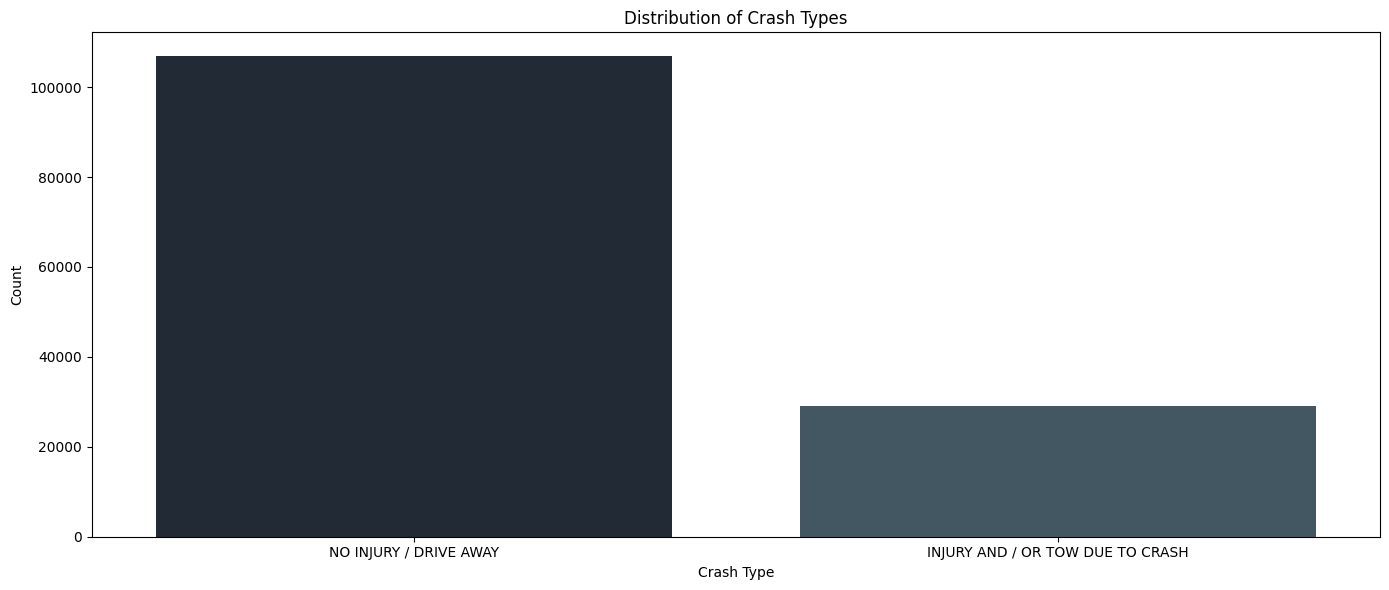

In [41]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_type', palette=colors)
plt.title('Distribution of Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Weather Conditions
</h3>

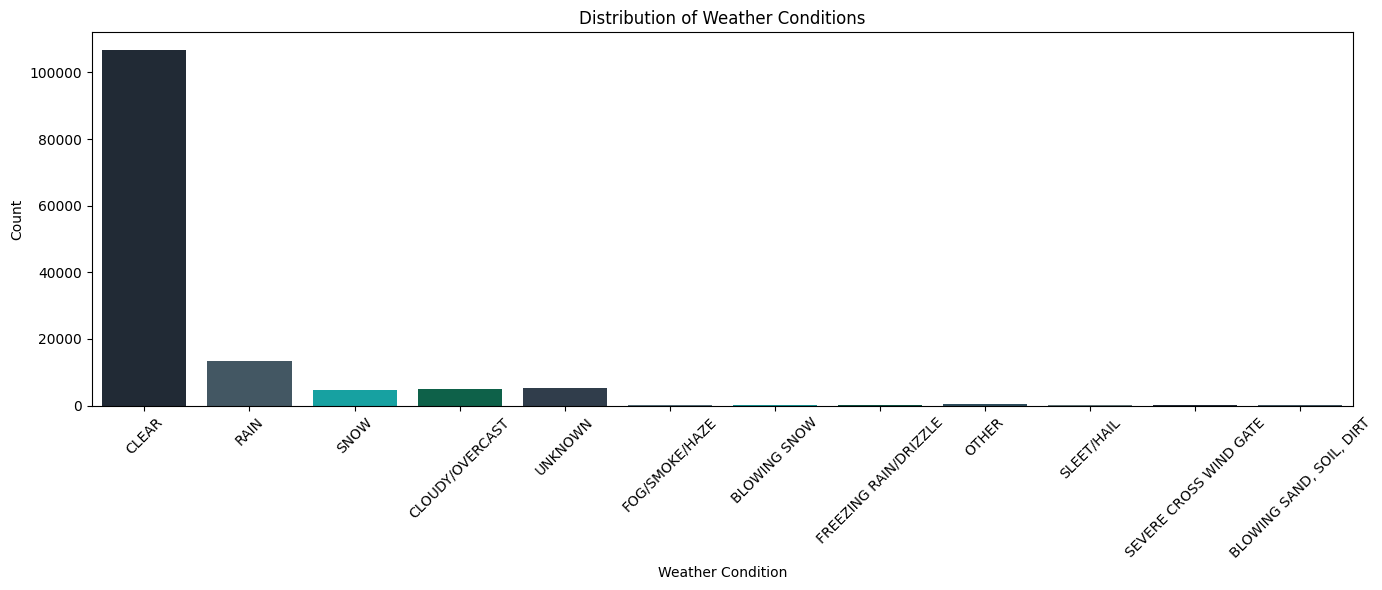

In [42]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='weather_condition', palette=colors)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Most Severe Injury Types
</h3>

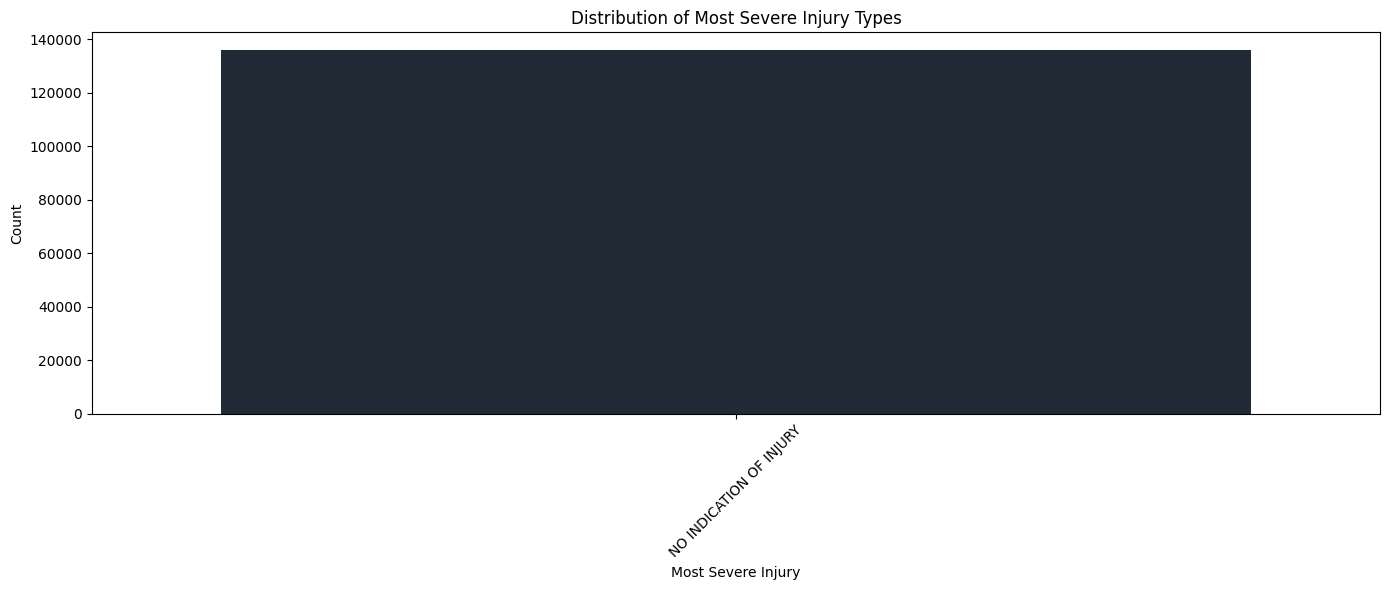

In [43]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='most_severe_injury', palette=colors)
plt.title('Distribution of Most Severe Injury Types')
plt.xlabel('Most Severe Injury')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Crashes by Day of the Week
</h3>

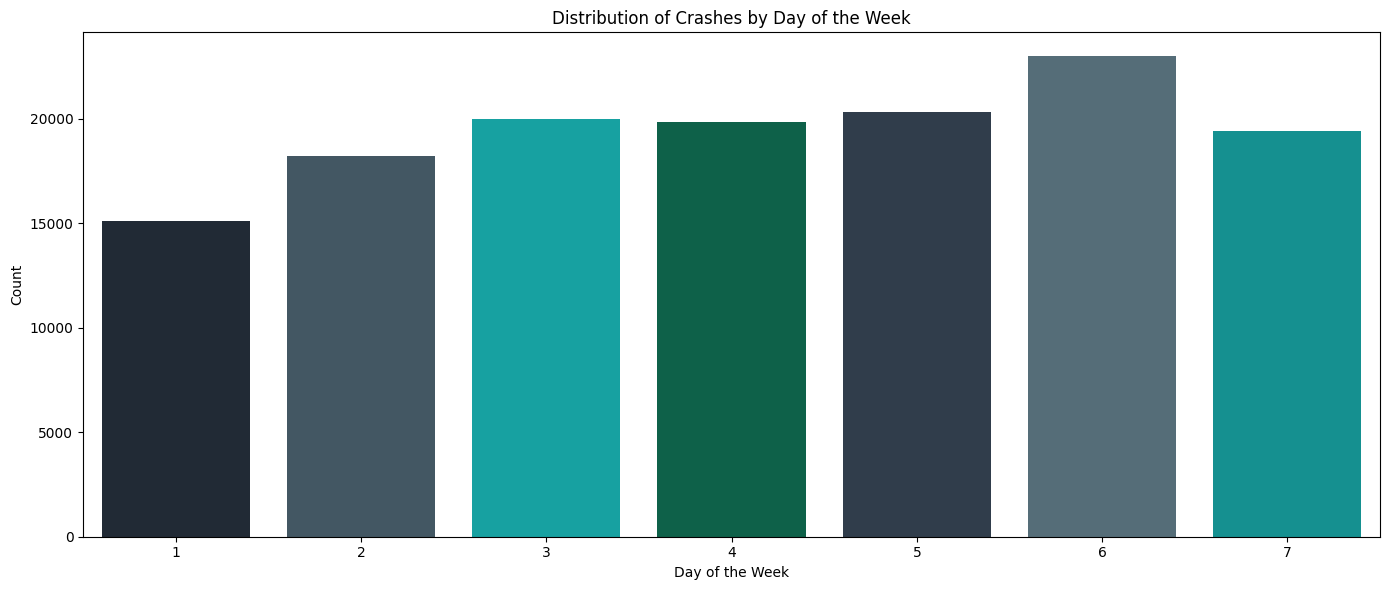

In [44]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_day_of_week', palette=colors)
plt.title('Distribution of Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Crashes by Day of the Week
</h3>

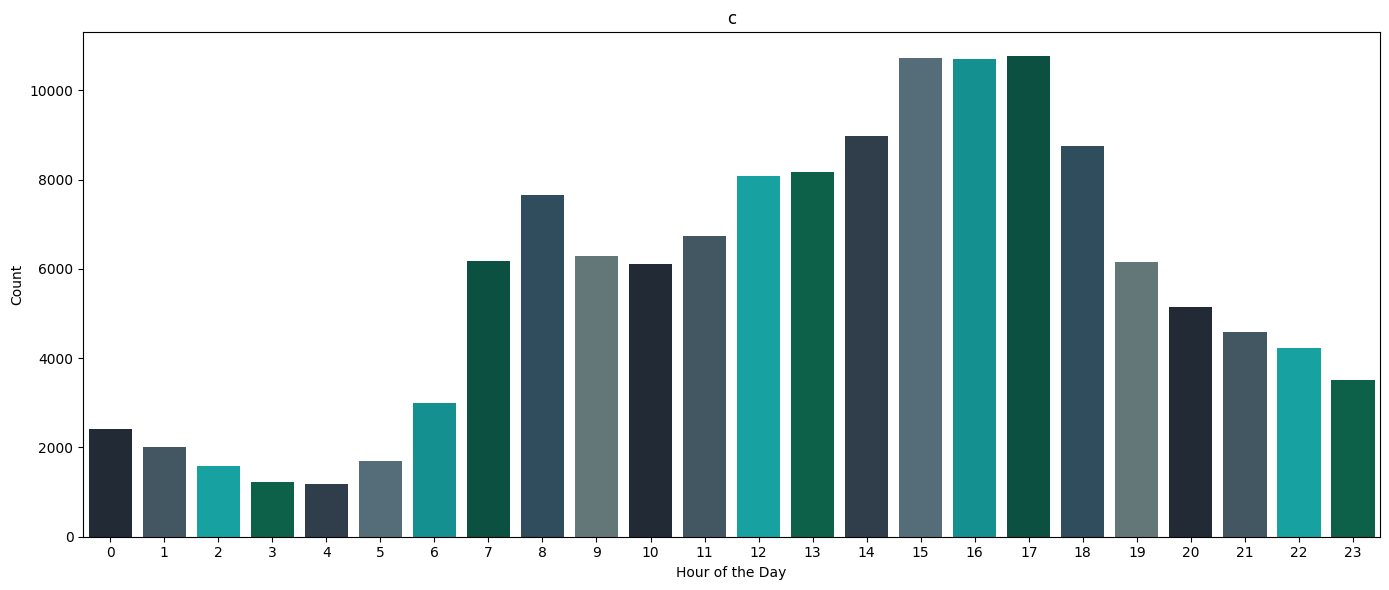

In [45]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_hour', palette=colors)
plt.title('c')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Weather Condition vs Most Severe Injury
</h3>

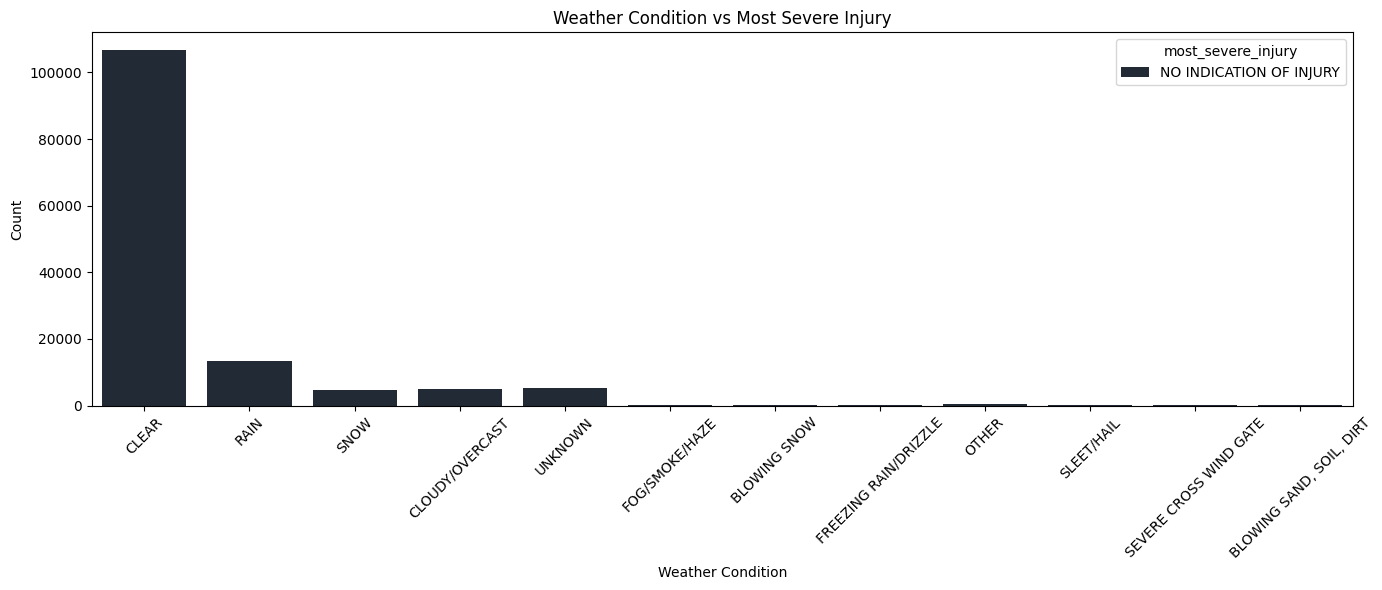

In [46]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='weather_condition', hue='most_severe_injury', palette=colors)
plt.title('Weather Condition vs Most Severe Injury')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Total Injuries
</h3>

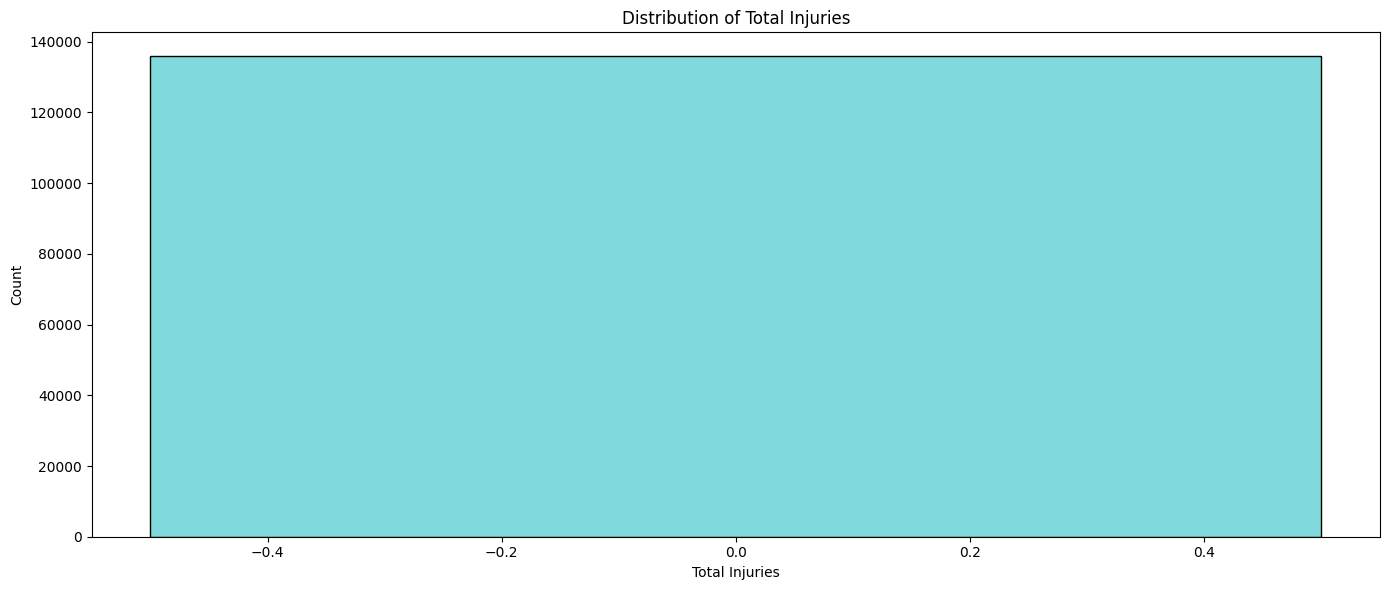

In [47]:
plt.figure(figsize=(14,6))
sns.histplot(df['injuries_total'], kde=True, color='#00b8b8')
plt.title('Distribution of Total Injuries')
plt.xlabel('Total Injuries')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Distribution of Crashes by Month
</h3>

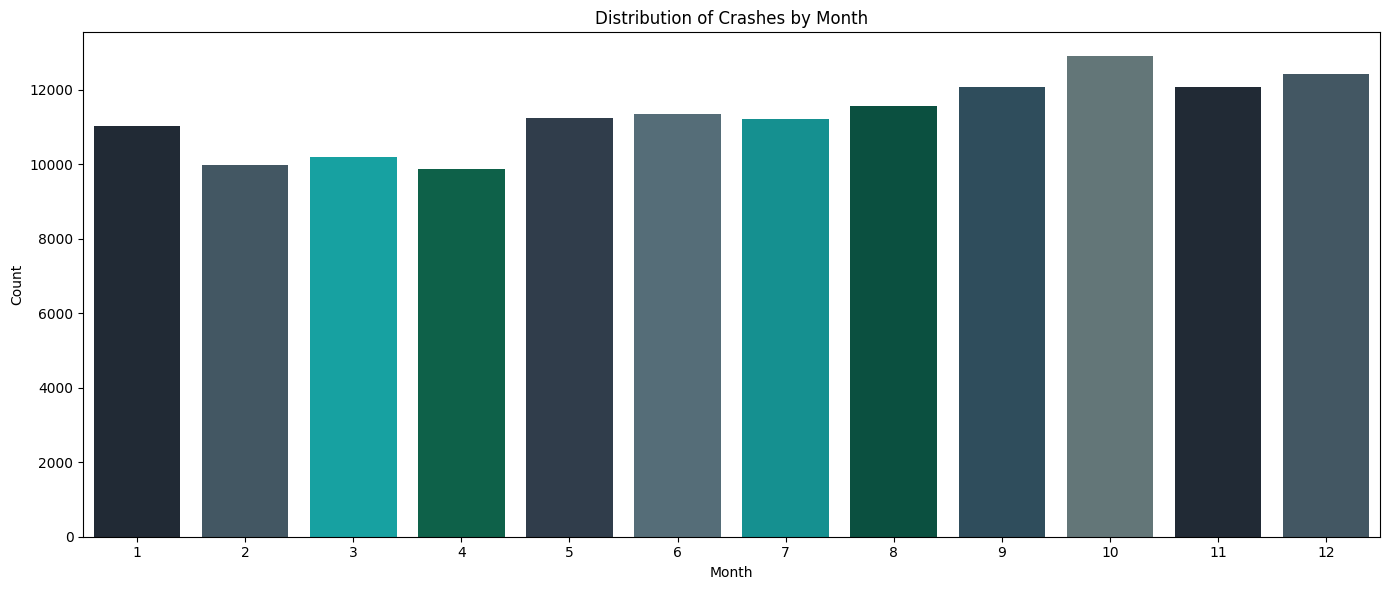

In [48]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_month', palette=colors)
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [49]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
6,12/20/2022 11:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11,3,12
8,06/04/2018 06:42:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,18,2,6


<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Removing variables that will not be used in model training
</h3>

In [50]:
df = df.drop(columns=['crash_date'])

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Label Encoder
</h3>

In [51]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: traffic_control_device
0 -> BICYCLE CROSSING SIGN
1 -> DELINEATORS
2 -> FLASHING CONTROL SIGNAL
3 -> LANE USE MARKING
4 -> NO CONTROLS
5 -> NO PASSING
6 -> OTHER
7 -> OTHER RAILROAD CROSSING
8 -> OTHER REG. SIGN
9 -> OTHER WARNING SIGN
10 -> PEDESTRIAN CROSSING SIGN
11 -> POLICE/FLAGMAN
12 -> RAILROAD CROSSING GATE
13 -> RR CROSSING SIGN
14 -> SCHOOL ZONE
15 -> STOP SIGN/FLASHER
16 -> TRAFFIC SIGNAL
17 -> UNKNOWN
18 -> YIELD

Column: weather_condition
0 -> BLOWING SAND, SOIL, DIRT
1 -> BLOWING SNOW
2 -> CLEAR
3 -> CLOUDY/OVERCAST
4 -> FOG/SMOKE/HAZE
5 -> FREEZING RAIN/DRIZZLE
6 -> OTHER
7 -> RAIN
8 -> SEVERE CROSS WIND GATE
9 -> SLEET/HAIL
10 -> SNOW
11 -> UNKNOWN

Column: lighting_condition
0 -> DARKNESS
1 -> DARKNESS, LIGHTED ROAD
2 -> DAWN
3 -> DAYLIGHT
4 -> DUSK
5 -> UNKNOWN

Column: first_crash_type
0 -> ANGLE
1 -> ANIMAL
2 -> FIXED OBJECT
3 -> HEAD ON
4 -> OTHER NONCOLLISION
5 -> OTHER OBJECT
6 -> OVERTURNED
7 -> PARKED MOTOR VEHICLE
8 -> PEDALCYCLIST
9 -> PEDESTRIAN
10 -

<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Machine Learning 🤖
</h1>

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Train Test Split
</h3>

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop('crash_type',axis = 1)
y = df['crash_type']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(108691, 22) (27173, 22)


<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  KNN
</h3>

In [54]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [55]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7670113715820852

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Logistic Regression
</h3>

In [56]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [57]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.7925131013366308

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  Random Forest
</h3>

In [58]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [59]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.7878040702167592

<h3 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
  All Results
</h3>

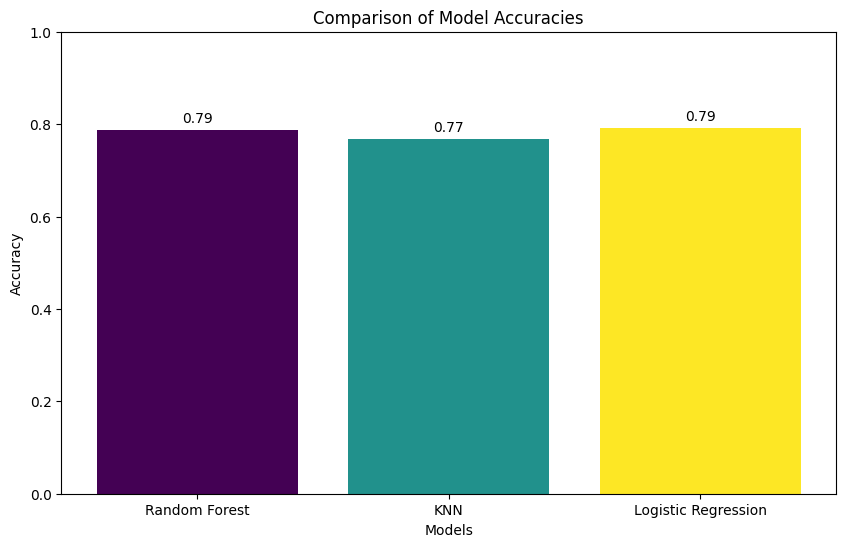

In [60]:
models = ['Random Forest', 'KNN', 'Logistic Regression']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()